Datos de entrenamiento: (9000, 40), Etiquetas: (9000,)
Datos de validación: (3000, 40), Etiquetas: (3000,)
Datos de prueba: (3000, 40), Etiquetas: (3000,)
Época 1/20, Pérdida Entrenamiento: 0.5766, Pérdida Validación: 0.4210
Época 2/20, Pérdida Entrenamiento: 0.3359, Pérdida Validación: 0.2955
Época 3/20, Pérdida Entrenamiento: 0.2477, Pérdida Validación: 0.2274
Época 4/20, Pérdida Entrenamiento: 0.1896, Pérdida Validación: 0.1814
Época 5/20, Pérdida Entrenamiento: 0.1530, Pérdida Validación: 0.1562
Época 6/20, Pérdida Entrenamiento: 0.1307, Pérdida Validación: 0.1402
Época 7/20, Pérdida Entrenamiento: 0.1169, Pérdida Validación: 0.1305
Época 8/20, Pérdida Entrenamiento: 0.1075, Pérdida Validación: 0.1245
Época 9/20, Pérdida Entrenamiento: 0.0999, Pérdida Validación: 0.1198
Época 10/20, Pérdida Entrenamiento: 0.0947, Pérdida Validación: 0.1171
Época 11/20, Pérdida Entrenamiento: 0.0901, Pérdida Validación: 0.1127
Época 12/20, Pérdida Entrenamiento: 0.0871, Pérdida Validación: 0.1114
Ép

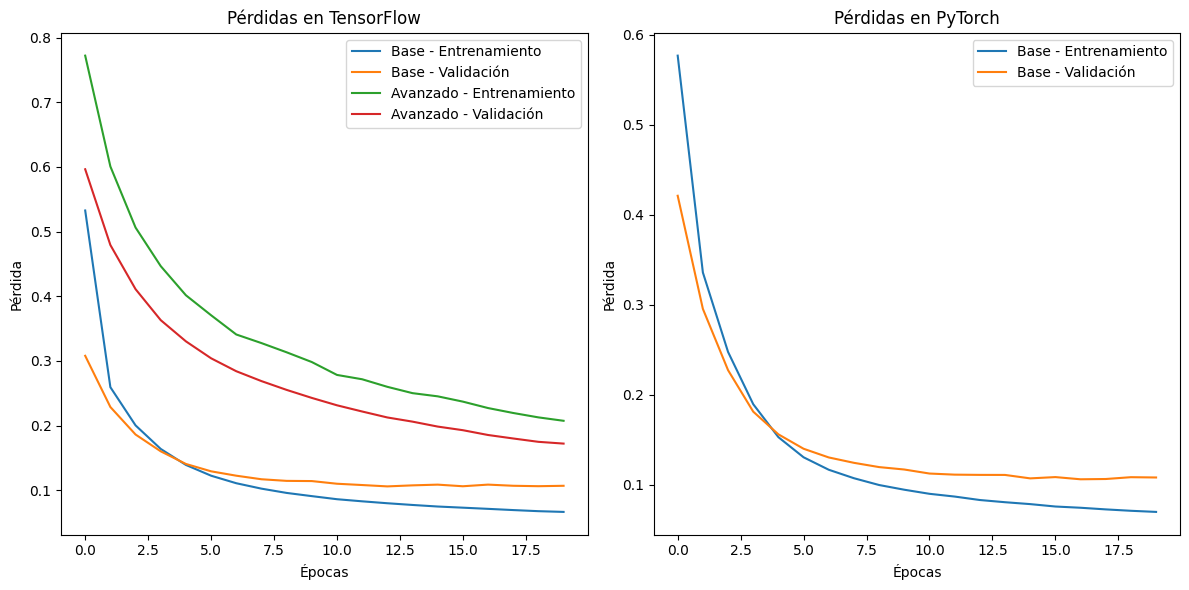

In [ ]:
# Importar librerías necesarias
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generar dataset
X, y = make_classification(
    n_samples=15000,
    n_features=40,
    n_informative=15,
    random_state=2022
)

# Dividir dataset
X_new, X_test, y_new, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size=0.25, random_state=42)

# Mostrar dimensiones
print(f"Datos de entrenamiento: {X_train.shape}, Etiquetas: {y_train.shape}")
print(f"Datos de validación: {X_val.shape}, Etiquetas: {y_val.shape}")
print(f"Datos de prueba: {X_test.shape}, Etiquetas: {y_test.shape}")

# ------------------- IMPLEMENTACIÓN EN TENSORFLOW -------------------

# Modelo base en TensorFlow
modelo_base_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(X_train.shape[1],), activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

modelo_base_tf.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

historia_base_tf = modelo_base_tf.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)

# Modelo avanzado en TensorFlow
modelo_avanzado_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=(X_train.shape[1],), activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

modelo_avanzado_tf.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

historia_avanzado_tf = modelo_avanzado_tf.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)

# ------------------- IMPLEMENTACIÓN EN PYTORCH -------------------

# Convertir datos a tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

# Crear DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Modelo base en PyTorch
class ModeloBasePyTorch(nn.Module):
    def __init__(self, input_dim):
        super(ModeloBasePyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 20)
        self.fc2 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

modelo_base_pt = ModeloBasePyTorch(input_dim=X_train.shape[1])
criterio = nn.BCELoss()
optimizador = optim.Adam(modelo_base_pt.parameters(), lr=0.001)

# Entrenamiento del modelo base en PyTorch
epocas = 20
perdidas_entrenamiento_pt, perdidas_validacion_pt = [], []

for epoca in range(epocas):
    modelo_base_pt.train()
    perdida_entrenamiento = 0
    for X_batch, y_batch in train_loader:
        optimizador.zero_grad()
        y_pred = modelo_base_pt(X_batch)
        perdida = criterio(y_pred, y_batch)
        perdida.backward()
        optimizador.step()
        perdida_entrenamiento += perdida.item()
    perdidas_entrenamiento_pt.append(perdida_entrenamiento / len(train_loader))

    modelo_base_pt.eval()
    perdida_validacion = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = modelo_base_pt(X_batch)
            perdida = criterio(y_pred, y_batch)
            perdida_validacion += perdida.item()
    perdidas_validacion_pt.append(perdida_validacion / len(val_loader))
    print(f"Época {epoca+1}/{epocas}, Pérdida Entrenamiento: {perdidas_entrenamiento_pt[-1]:.4f}, Pérdida Validación: {perdidas_validacion_pt[-1]:.4f}")

# ------------------- GRAFICAR RESULTADOS -------------------

# Graficar pérdidas de TensorFlow
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historia_base_tf.history['loss'], label="Base - Entrenamiento")
plt.plot(historia_base_tf.history['val_loss'], label="Base - Validación")
plt.plot(historia_avanzado_tf.history['loss'], label="Avanzado - Entrenamiento")
plt.plot(historia_avanzado_tf.history['val_loss'], label="Avanzado - Validación")
plt.title("Pérdidas en TensorFlow")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

# Graficar pérdidas de PyTorch
plt.subplot(1, 2, 2)
plt.plot(perdidas_entrenamiento_pt, label="Base - Entrenamiento")
plt.plot(perdidas_validacion_pt, label="Base - Validación")
plt.title("Pérdidas en PyTorch")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.tight_layout()
plt.show()



# **Análisis de Resultados**

## **Gráfica de TensorFlow**
- **Modelo base**:
  - La pérdida de entrenamiento disminuye rápidamente al inicio y se estabiliza después de unas 10 épocas.
  - La pérdida de validación es consistente con la pérdida de entrenamiento, lo que indica que el modelo base no sufre de sobreajuste.
- **Modelo avanzado**:
  - Inicialmente, la pérdida de entrenamiento y validación son mayores que las del modelo base debido a la arquitectura más compleja y la regularización.
  - Sin embargo, al final, el modelo avanzado alcanza pérdidas más bajas que el modelo base, lo que sugiere que su capacidad adicional le permite capturar mejor los patrones del conjunto de datos.

## **Gráfica de PyTorch**
- Solo se compara el **modelo base** en PyTorch.
- La pérdida de entrenamiento y validación disminuyen de manera consistente y se estabilizan cerca de los mismos valores que el modelo base en TensorFlow.
- Esto demuestra que ambos frameworks logran resultados similares para configuraciones equivalentes.

## **Análisis de las pérdidas**
1. Al inicio, las pérdidas de validación son más altas que las de entrenamiento, lo cual es esperado porque el modelo aún no ha aprendido patrones suficientes del conjunto de datos.
2. A medida que avanza el entrenamiento, las pérdidas de validación y entrenamiento convergen, lo que indica que el modelo está generalizando bien sin sobreajuste significativo.
3. En TensorFlow, el modelo avanzado logra un mejor desempeño final que el modelo base, lo que se refleja en pérdidas más bajas tanto en entrenamiento como en validación.


## **Conclusiones**
1. **TensorFlow vs PyTorch**:
   - Ambos frameworks logran resultados similares para modelos equivalentes, validando que las implementaciones están correctamente configuradas.
   - TensorFlow permite comparar modelos simples y avanzados, destacando la importancia de arquitecturas más profundas y regularización para mejorar el desempeño.

2. **Modelo avanzado vs modelo base**:
   - El modelo avanzado en TensorFlow tiene un desempeño superior al modelo base gracias a su capacidad de capturar patrones más complejos.
   - Sin embargo, requiere más tiempo de entrenamiento y ajustes cuidadosos, como una tasa de aprendizaje más baja y el uso de regularización.

3. **Pérdida y generalización**:
   - La pérdida de validación permanece cercana a la pérdida de entrenamiento en todos los casos, lo que indica que los modelos no sufren de sobreajuste.